# Import

In [78]:
import tensorflow as tf
from tensorflow.keras import layers
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt

# MNIST 데이터 세팅: MLP

In [79]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0 #샘플 값 소수 변환

x_train.shape, x_test.shape
#각 샘플 값이 60000개의 28x28 2D data로 이루어져있음, MLP 처리를 위해 길이 784인 1D data로 reshape 필요

((60000, 28, 28), (10000, 28, 28))

In [80]:
x_train = x_train.reshape(x_train.shape[0],-1)
x_test = x_test.reshape(x_test.shape[0],-1)

x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [81]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train.shape, y_test.shape

((60000, 10), (10000, 10))

# 모델 생성: MLP

In [82]:
model_mlp = tf.keras.models.Sequential()
model_mlp.add(layers.Dense(256))
model_mlp.add(layers.Activation('relu'))
model_mlp.add(layers.Dense(10))
model_mlp.add(layers.Activation('softmax'))

SGD = tf.keras.optimizers.SGD(learning_rate=0.1)
Adag = tf.keras.optimizers.Adagrad(learning_rate=0.1)
model_mlp.compile(optimizer=Adag, loss='mse', metrics=['accuracy'])

# 학습 진행: MLP

In [83]:
hist_mlp = model_mlp.fit(x_train, y_train, batch_size=256, epochs=10)
model_mlp.evaluate(x_test,y_test)

Epoch 1/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0666 - accuracy: 0.5408
Epoch 2/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0325 - accuracy: 0.8252
Epoch 3/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0229 - accuracy: 0.8710
Epoch 4/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0194 - accuracy: 0.8864
Epoch 5/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0175 - accuracy: 0.8956
Epoch 6/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0162 - accuracy: 0.9020
Epoch 7/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0153 - accuracy: 0.9061
Epoch 8/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0146 - accuracy: 0.9107
Epoch 9/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0140 - accuracy: 0.9136
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0127 - accuracy: 0.9217

[0.012667379342019558, 0.9217000007629395]

# 모델 생성: CNN

In [84]:
#다시 2D 데이터로
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [85]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [86]:
model_cnn = tf.keras.models.Sequential()
model_cnn.add(layers.Conv2D(filters=32, kernel_size=[3,3], padding='same', activation='relu'))
model_cnn.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
model_cnn.add(layers.Conv2D(filters=32, kernel_size=[3,3], padding='same', activation='relu'))
model_cnn.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
model_cnn.add(layers.Flatten())
model_cnn.add(layers.Dense(10,activation='softmax'))

Adag = tf.keras.optimizers.Adagrad(learning_rate=0.1)
model_cnn.compile(optimizer=Adag, loss='categorical_crossentropy', metrics=['accuracy'])

# 학습 진행: CNN

In [87]:
hist_cnn = model_cnn.fit(x_train, y_train, batch_size=256, epochs=10)
model_cnn.evaluate(x_test,y_test)

Epoch 1/10
235/235 [==============================] - 3s 11ms/step - loss: 0.3584 - accuracy: 0.8940
Epoch 2/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0949 - accuracy: 0.9713
Epoch 3/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0720 - accuracy: 0.9780
Epoch 4/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0588 - accuracy: 0.9821
Epoch 5/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0494 - accuracy: 0.9849
Epoch 6/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0443 - accuracy: 0.9863
Epoch 7/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0399 - accuracy: 0.9880
Epoch 8/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0366 - accuracy: 0.9890
Epoch 9/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0342 - accuracy: 0.9897
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0447 - accurac

[0.044705577194690704, 0.9847000241279602]

# 모델 생성: RNN


In [ ]:
x_train, x_test = x_train.squeeze(), x_test.squeeze()

model_rnn = tf.keras.models.Sequential()
model_rnn.add(layers.LSTM(64))
model_rnn.add(layers.Dense(10))

model_rnn.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    optimizer=Adag,
    metrics=["accuracy"],
)

# 학습 진행: RNN

In [104]:
hist_rnn = model_rnn.fit(x_train,y_train, batch_size=256, epochs=10)
model_rnn.evaluate(x_test,y_test)

Epoch 1/10
235/235 [==============================] - 4s 10ms/step - loss: 1.1739 - accuracy: 0.6000
Epoch 2/10
235/235 [==============================] - 2s 10ms/step - loss: 0.3547 - accuracy: 0.8895
Epoch 3/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1936 - accuracy: 0.9427
Epoch 4/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1424 - accuracy: 0.9577
Epoch 5/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1128 - accuracy: 0.9671
Epoch 6/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0949 - accuracy: 0.9719
Epoch 7/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0835 - accuracy: 0.9754
Epoch 8/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0742 - accuracy: 0.9780
Epoch 9/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0664 - accuracy: 0.9800
Epoch 10/10
313/313 [==============================] - 2s 5ms/step - loss: 0.0757 - accurac

[0.07567944377660751, 0.9781000018119812]

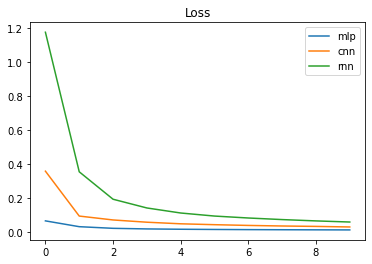

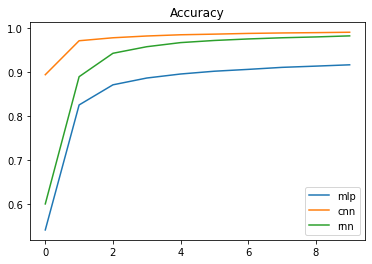

In [105]:
plt.figure(1)
plt.plot(hist_mlp.history['loss'], label='mlp')
plt.plot(hist_cnn.history['loss'], label = 'cnn')
plt.plot(hist_rnn.history['loss'], label='rnn')
plt.legend()
plt.title('Loss')

plt.figure(2)
plt.plot(hist_mlp.history['accuracy'], label='mlp')
plt.plot(hist_cnn.history['accuracy'], label='cnn')
plt.plot(hist_rnn.history['accuracy'], label='rnn')
plt.legend()
plt.title('Accuracy')

plt.show()

In [8]:
kwargs = {'meta_csv_path':'dd/dd'}
args = ('dskf')
{key: value for key, value in kwargs.items() if key in args}

{}

SyntaxError: invalid syntax (<ipython-input-6-a86a2c760d99>, line 1)

In [ ]:
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()
import numpy as np
import os

tf.reset_default_graph()
# os.environ["CUDA_VISIBLE_DEVICES"] = '3'
np.random.seed(0)

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

y_train, y_test = tf.raw_ops.OneHot(indices=y_train, depth=10, on_value=1, off_value=0, axis=1), \
                  tf.raw_ops.OneHot(indices=y_test, depth=10, on_value=1, off_value=0, axis=1)

# rnn
# params modification

seq_block = 1
epochs = 10
batch_size = 512
learning_rate = 0.1
num_seq = 28 * seq_block
num_layers = 3
iter_in_an_epoch = int(y_train.shape[0] // batch_size)

x_train = x_train.reshape(x_train.shape[0], num_seq, -1)
x_test = x_test.reshape(x_test.shape[0],num_seq, -1)

X = tf.placeholder(tf.float32, [None, num_seq, x_train.shape[-1]])
Y = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)

# Wxh = tf.Variable(tf.random_normal([28 * sequence_block * 2, 28 * sequence_block]))  # [h_t-1,x_t] 곱해지는 Weight
# bh = tf.Variable(tf.random_normal([28 * sequence_block * 2]))
#
Wyh = tf.Variable(tf.random_normal([x_train.shape[-1], 10]))
by = tf.Variable(tf.random_normal([10]))
#
# h_prev = tf.zeros([28 * sequence_block])
# for x_t in tf.unstack(tf.transpose(X, perm=[1,0,2])):
#     h_t = tf.math.tanh(tf.matmul(tf.concat(0, [h_prev, x_t]), Wxh))
#     h_prev = h_t
#
# y_t = tf.nn.relu(tf.matmul(h_t, Wyh) + by)

layers = [tf.nn.rnn_cell.BasicLSTMCell(x_train.shape[-1],forget_bias=0.9)] * num_layers
drops = [tf.nn.rnn_cell.DropoutWrapper(layer, output_keep_prob = keep_prob) for layer in layers]
multi_layer_cell = tf.nn.rnn_cell.MultiRNNCell(drops)
outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)
outputs = tf.transpose(outputs, [1, 0, 2])
outputs = outputs[-1]

rnn_logits = tf.matmul(outputs, Wyh) + by
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=rnn_logits, labels=Y))
train = tf.train.AdagradOptimizer(learning_rate).minimize(cost)
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(rnn_logits, 1), tf.argmax(Y, 1)), tf.float32))



with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(epochs):
        avg_cost = 0
        for i in range(iter_in_an_epoch):
            batch_x = x_train[batch_size * i:batch_size * (i + 1)]
            batch_y = y_train[batch_size * i:batch_size * (i + 1)].eval(session=sess)
            _, c, val_acc = sess.run((train, cost, accuracy), feed_dict={X: batch_x, Y: batch_y, keep_prob: 1})
            avg_cost += c / iter_in_an_epoch
        print(f"Epoch: {epoch + 1}, " + f"Cost: {avg_cost:.3f}, " + f"accuracy: {val_acc:.4f}")

    print("Cost:", sess.run(cost, feed_dict={X: x_test, Y: y_test.eval(session=sess), keep_prob: 1}))
    print("Accuracy:", sess.run(accuracy, feed_dict={X: x_test, Y: y_test.eval(session=sess), keep_prob: 1}))
